## Segmentación de empresas eléctricas de LATAM y El Caribe.

## 1. Introducción

---

El desarrollo energético de LATAM y el CARIBE ha estado fuertemente relacionado a las tendencias mundiales pero también a situaciones pariculares de cada país.

Dentro del ámbito energético es importante conocer las tendencias y contar con estimaciones y proyecciones de ciertos parámetros a la hora de la toma de decisiones estratégicas. 

El presente proyecto tendrá como finalidad, en primera instancia, realizar un análisis descriptivo de la información disponible. 

Posteriormente se realizará una limpeza y adecuación de los datos para un correcto análisis. Se verifica la presencia de valores nulos y atípicos para verificar si existen registros que no deberán ser considerados en el análisis. 

Luego de la realización de la adecuación del dataset, se realizan una serie de gráficas utilizando la librería Seaborn y con el apoyo de análisis numéricos, se realzan las observaciones y verificación de las hipótesis y preguntas planteadas al principio del análisis. 

El presente proyecto se justifica dada la importancia crítica que tiene el adecuado suministro de energía eléctrica como motor del desarrollo local, regional y mundial. Con el paso de los años las empresas de energia (públicas y privadas) han ido migrando hacia un paradigma de gestión *data driven*, impulsado primordialmente por la digitalización y la aparición de controles regulatorios producto de la privatización de este servicio en muchos paises, con lo que también se pone en escena la operación de organismos de fiscalización y control. De igual forma las diferentes preocupaciones a nivel internacional relacionadas con la seguridad del suministro eléctrico, así como mantener como objetivo una mejora en los indicadores de eficiencia y reducción de emanaciones de efecto invernadero hacen que el presente análisis sea de interés para diferentes perfiles interesados en obtener respuesta a diferentes cuestiones relacionadas.  

El dataset seleccionado contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales.

Toda la información ha sido compilada por el Banco Mundial, descargada del sitio: https://energydata.info/

### Motivación

El mercado energético es uno de los de mayor importancia  nivel mundial, las empresas de la región se enfrentan a diferentes retos y necesidades.

Por ejemplo, una empresa con mucha longitud de líneas de distribución y alta cantidad de reclamos podría estar interesada en servicios de consultoría para mejorar sus indicadores, por otro lado, una empresa con niveles altos de transporte de energía e indicadores altos de hurto de energía y y conexiones irregulares, debería invertir en su gestión de pérdidas de energía. 

La propuesta es generar una clasificación de empresas para poner a disposición del comité técnico-comercial de una empresa de servicios de consultoría y provisión de equipos, de esta forma será posible orientar de mejor forma las estrategias de venta conociendo previamente las necesidades propias de cada clente potencial. 

De esta forma se minimizarán los tiempos invertidos en clientes que por sus inidicadores es muy probable que no estén interesados en todas las soluciones de consultoría y productos ofrecidos. 


### Audiencia

La audiencia para este proyecto es personal del sector técnico-comercial de una empresa de servicios de consultoría y provisión de equipos de baja, media y alta tensión para empresas de distribución eléctrica. 

### Objetivo

Generar clasificación de empresas para orientar adecuadamente las estrategias comerciales de una empresa de soluciones técnicas y consultoría del sector energía. 

### Contexto comercial

El proyecto se encuadra en la necesidad de una empresa hipotetica que pretende ingresar con equipos para el rubro distribución eléctrica en el mercado LATAM y CARIBE. 

La compañía requiere definir sus estrategias de ventas, por lo que ha solicitado la realización del estudio con datos estadísticos obtenidos en la base de datos público proporcionados por del Banco Mundial. Con el análisis de datos y los insights presentados, la gerencia de planificación comercial definirá y orientará las políticas comerciales en la región. 


### Problema comercial 

Dificultad para orientar adecuadamente las estrategias comerciales según la empresa o país. 

Pérdida de tiempo productivo por el ofrecimiento de productos de manera general, cuando las empresas orientarán sus gastos e inversiones en función de sus requerimietos específicos. 

### Contexto analítico

Se tiene un data set con información histórica de empresas de la región LATAM y Caribe, información compilada y brindad por el Banco Mundial sin cargo. 

Se prevé que con esta información se tiene información suficiente para la deteminación de las recomendacione solicitadas. 

## 2. Preguntas e hipótesis planteadas

---

### Hipótesis:
Las empresas pueden agruparse en función de parámetros como el índice de pérdidas de energía, km de lineas, energía transportada, cantidad de usuarios, de este modo pueden generarse categorías para orientar las estrategias comerciales de la compañía, esto debido a que las diferentes líneas de productos y servicios no serían de interés común para todas las empresas. 

La orientación de la estrategia comercial para empresas dentro del mismo país puede ser diferente.  



### Preguntas formuladas:

Es posible agrupar las empresas eléctricas en diferentes clusters para orientar las estrategias de ventas?

Es posible agregar a los grupos definidos un factor de agrupamiento por zona geográfica? 

Es posible mantener la misma estrategia comercial a nivel país? 



## 3. Análisis exploratorio de datos (EDA)

### 3. Importación de librerías a utilizar



In [1]:
#Librerías para manejo de DF y gráficas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#Importando las librerias a utilizar para el proceso de clusterización 

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
#Configuramos para que no muestre los warnings y obtener una visualización más limpia
import warnings
warnings.filterwarnings('ignore')


### 4. Carga de Dataset

Este Dataset contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales. 

Fuente de datos: https://energydata.info/


In [3]:
#Carga de archivo .csv a utilizar

df= pd.read_csv("2.Latam data energy access_world_bank.csv", sep=";")

#Muestra de encabezado de Data Frame
df.head(5)


,_id,country,utility name,utility code,utility ID,year,Type of connection,1,2,3,...,16,17,18,19,20,21,22,23,24,25
0,1,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and ...,Total Number of residential connections in the...,Total electricity sold per year (MWh),...,Number of residential subscribers per 100 hous...,Number of customer complaints per year,Average duration between customer complaint an...,Average residential tariff (local nominal curr...,Average industrial tariff (local nominal curre...,Installation Cost (residential) local nominal ...,Installation Cost (Industrial) local nominal c...,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,2,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN


In [4]:
# Obtenemos las dimensiones del Dataset
df.shape

(4075, 32)

In [5]:
#Obtenemos la info de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 4075 non-null   int64 
 1   country             4075 non-null   object
 2   utility name        4075 non-null   object
 3   utility code        4061 non-null   object
 4   utility ID          4052 non-null   object
 5   year                4061 non-null   object
 6   Type of connection  4061 non-null   object
 7   1                   2899 non-null   object
 8   2                   2916 non-null   object
 9   3                   3190 non-null   object
 10  4                   1438 non-null   object
 11  5                   2550 non-null   object
 12  6                   818 non-null    object
 13  7                   497 non-null    object
 14  8                   1284 non-null   object
 15  9                   1143 non-null   object
 16  10                  1283

Al obtener las dimensiones mediante el método "shape" se logra determinar que el Data Frame posee 4075 filas y 32 columnas, por otra parte, las columnas contienen datos de tipo objeto. 

______________________________________________________________________________________________________________________

#### Observación importante: Se verifica que los datos del index se encuentran en la 3a fila del data set (del csv cargado), mientras que la fila 1 contiene un correlativo de las columnas y la fila 2 posee información explicativa del contenido de cada columna. 
  
#### Se genera un array para almacenar la información explicativa del contedido de cada celda y se define la información de la fila No. 3 como encabezados de columna.

### 5. Preparación del Dataset

A continuación se crea un array para guardar las descripción de los campos para futura referencia. 

In [6]:

df_desc = df.iloc[0].to_numpy()

#Eliminando la 1a columna que es redundante
df_desc = np.delete(df_desc, 0)

for a in df_desc:
    #print(f"Columna {df_desc.index[a]} : {a}")
    i = list(df_desc).index(a)
    print(f"Descripción de Columna {i}: {a}")
    

Descripción de Columna 0: country
Descripción de Columna 1: utility name
Descripción de Columna 2: utility code
Descripción de Columna 3: utility ID
Descripción de Columna 4: year
Descripción de Columna 5: Type of connection
Descripción de Columna 6:  Total number of connections (residential and non-residential) in the utility area
Descripción de Columna 7: Total Number of residential connections in the utility area
Descripción de Columna 8: Total electricity sold per year (MWh)
Descripción de Columna 9: Length of distribution network (km) 
Descripción de Columna 10: Total number of employees 
Descripción de Columna 11: Average wholesale price paid per MWh (local nominal currency)
Descripción de Columna 12: Average transmission charges per MWh purchased (local nominal currency)
Descripción de Columna 13: OPEX (operation expenditures) of the distribution services (local nominal currency)
Descripción de Columna 14: CAPEX (captial expenditures) of the distribution services (local nominal 

Luego se eliminan las primeras dos filas y se asigna la tercera como "index" para que el Data Frame sea cargado de manera correcta:

In [7]:
df.columns = df.iloc[1]
df=df.drop([0,1])
df= df.drop(columns=[2])

# Se muestra el data set listo para el proceso de análisis
df.head()

1,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,length_net,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,NaN,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,NaN,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN
5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1997,Elec - Distribution,5.046.158.333,4.385.358.333,134097.2,NaN,...,NaN,NaN,NaN,2.891.591.355,277.406.999,NaN,NaN,0,NaN,NaN
6,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1998,Elec - Distribution,5.229.333.333,4.585.483.333,146304.8,NaN,...,NaN,NaN,NaN,2.985.768.958,295.955.862,NaN,NaN,0,NaN,NaN


In [8]:
#Se observó que hay dos tipos de nombre que hace referncia al pais Perú, nombres "Per" y "Peru"

df["country"].unique()



array(['Ecuador', 'Costa Rica', 'Mexico', 'Uruguay', 'Peru', 'Per',
       'Brazil', 'Chile', 'Colombia', 'Paraguay', 'Haiti', 'Argentina',
       'Belize ', 'Bolivia', 'Antigua and Barbuda ', 'Dominica',
       'Grenada', 'St Kitts and Nevis', 'St Lucia',
       'St Vincent and the Grenadines ', 'El Salvador', 'Guatemala',
       'Honduras', 'Nicaragua', 'Jamaica', 'Panama',
       'Republica Dominicana', 'Venezuela'], dtype=object)

Se reemplazan los nombres de pais para mayor legibilidad de los gráficos. 

In [96]:
 reemplazos = {'Ecuador':'ECU', 'Costa Rica':'CRI', 'Mexico':'MEX', 'Uruguay':'URU', 'Peru':'PER', 'Per':'PER',
       'Brazil':'BRA', 'Chile':'CHI', 'Colombia':'COL', 'Paraguay':'PAR', 'Haiti':'HAI', 'Argentina':'ARG',
       'Belize ':'BLZ', 'Bolivia':'BOL', 'Antigua and Barbuda ':'ANB', 'Dominica':'DOM',
       'Grenada':'GRE', 'St Kitts and Nevis':'SKN', 'St Lucia':'SLU',
       'St Vincent and the Grenadines ':'SVI', 'El Salvador':'SLV', 'Guatemala':'GTM',
       'Honduras':'HON', 'Nicaragua':'NIC', 'Jamaica':'JAM', 'Panama':'PAN',
       'Republica Dominicana':'RDO', 'Venezuela':'VEN'}
    
df.replace({'country': reemplazos}, inplace=True)
print(df)
    
    

1    country                                             name      code  \
2        ECU                  EMPRESA ELECTRICA LOS RIOS S.A.  LOS RIOS   
3        ECU                  EMPRESA ELECTRICA LOS RIOS S.A.  LOS RIOS   
4        ECU                  EMPRESA ELECTRICA LOS RIOS S.A.  LOS RIOS   
5        ECU                  EMPRESA ELECTRICA LOS RIOS S.A.  LOS RIOS   
6        ECU                  EMPRESA ELECTRICA LOS RIOS S.A.  LOS RIOS   
...      ...                                              ...       ...   
4070     VEN  C.V.G. Electrificacion del Caroni C.A. Caracas     EDELCA   
4071     VEN  C.V.G. Electrificacion del Caroni C.A. Caracas     EDELCA   
4072     VEN  C.V.G. Electrificacion del Caroni C.A. Caracas     EDELCA   
4073     VEN  C.V.G. Electrificacion del Caroni C.A. Caracas     EDELCA   
4074     VEN  C.V.G. Electrificacion del Caroni C.A. Caracas     EDELCA   

1    id_conce  year             typ_conc  n_con  n_rd_con    mwh_sold  \
2      201001  1994  Elec 

Se requiere unidicar los datos para el pais "Perú", el cual esta afecatado por un error en el dataset

In [97]:
df=df.replace("Per", "Peru")
df["country"].unique()
df=df.replace("Per", "Peru")

Una vez corregido el campo "country", se desea saber la cantidad de valores NAN que se están manejando en el Dataset

In [98]:
df_nan=df.isna().sum()
df_nan

1
country               0
name                  0
code                 14
id_conce             23
year                 14
typ_conc             14
n_con              1577
n_rd_con           1771
mwh_sold           1468
length_net         2880
n_wrks             1805
whosale_price_p    3606
transm_chrs_p      3788
opex               2856
capex              3078
totex              2873
d_losses           1575
d_losses_t         3551
d_losses_c         3556
dur_interr         2891
freq_interr        2980
coverage           2449
complains          3621
dur_problem        3766
avg_rd_tariff_p    2774
avg_in_tariff_p    3284
inst_rd_price_p    3833
inst_in_price_p    3954
d_priv              383
rd_cn_wkr          4025
mwh_wkr            3991
dtype: int64

* Se observa un alto porcentaje de valores NAN en muchos campos.

* Se asume que los valores NAN deberían corresponder a los periodos mas antiguos posiblemente por falta de registro de los parámetros 

* En este caso no se considera recomendable realizar imputación de los datos faltantes, dado que se podrían generar errores de interpretación. 

* Por otra parte, al analizar la fuente de los datos y el comportamiento, la cantidad de valores faltantes no implica que el Dataset brinde inrformación incorrecta o incompleta. 

## 6. Análisis de los datos (EDA)
----
### 6.1. Análisis de evolución de disponibilidad de información 


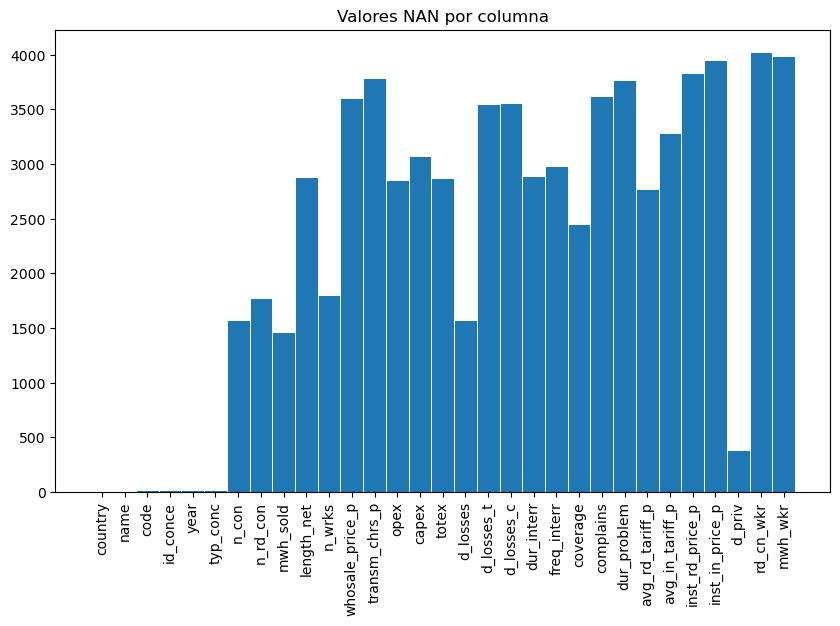

<Figure size 500x500 with 0 Axes>

In [99]:
fig, ax = plt.subplots()
ax.bar(df_nan.index, df_nan.values, width=1, edgecolor="white", linewidth=0.7 )
plt.xticks(rotation=90)
plt.figure(figsize=(5, 5))
ax.set_title('Valores NAN por columna')

plt.show()

Se aprecia de manera gráfica que la cantidad de valores NAN es elevada para el dataset elegido. 

Como primera impresión se podría tender a pensar que el dataset no es adecuado para el análisis, no obstante dentro del comportamiento observado surge la interrogante de si la situación de los valores NAN tiene relación con l aantiguedad de los registros (En las decadas pasadas la información en general no estaba disponible, además presumiblemente no se gestionaban indicadores) 

Para verificar lo anterior se crea la siguiente grafica donde se totalizan los registros válidos disponibles (para todos los campos de datos) en función del año: 

In [100]:
df_nancount=df.groupby('year').count()
df_nancount.head()

1,country,name,code,id_conce,typ_conc,n_con,n_rd_con,mwh_sold,length_net,n_wrks,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
year,,,,,,,,,,,,,,,,,,,,,
1973,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1974,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1975,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1976,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1977,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Se seleccionan 3 parámetros para evaluar la cantidad de datos que se fueron obteniendo en el tiempo

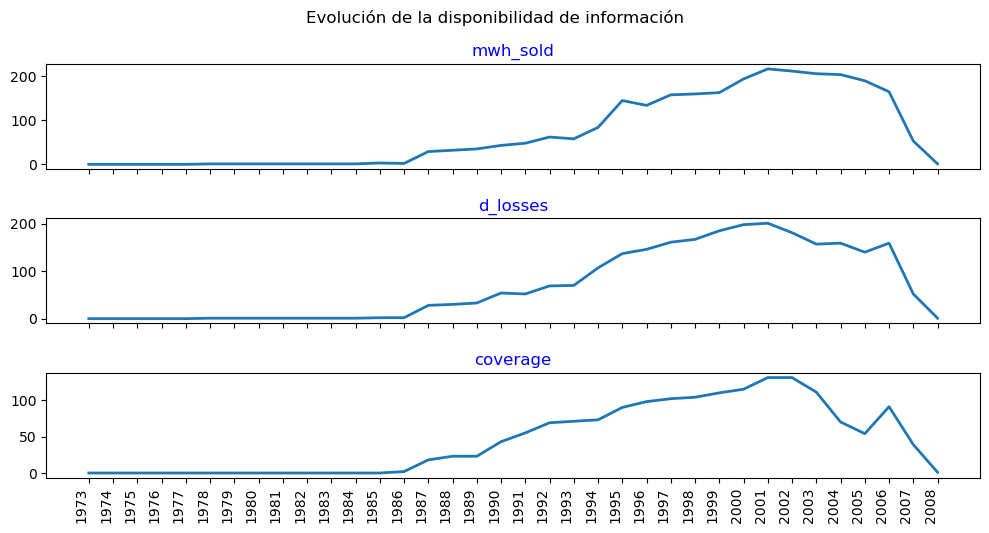

In [101]:
fig, ax = plt.subplots(3,1)
ax[0].plot(df_nancount.index, df_nancount['mwh_sold'], linewidth=2.0)
ax[1].plot(df_nancount.index, df_nancount['d_losses'], linewidth=2.0)
ax[2].plot(df_nancount.index, df_nancount['coverage'], linewidth=2.0)
fig.suptitle("Evolución de la disponibilidad de información")
ax[0].set_title('mwh_sold', fontsize=12, color="blue") 
ax[1].set_title('d_losses', fontsize=12, color="blue") 
ax[2].set_title('coverage', fontsize=12, color="blue") 
fig.tight_layout()
fig.autofmt_xdate(rotation=90)

Se observa que el tal como se presumía, la disponibilidad de información para los 2 parámetros elegidos comienza a ser relevante durante la década de 1980. El decrecimiento en los últimos períodos puede responder a la demora o  tiempo de "desclasificación" de la información por empresas y organismos de control. 

Tiene sentido pensar que en los últimos años la disponibilidad de la información se ha ido incrementando en todos los sectores, influenciado por el monitoreo de indicadores por parte de los organismos de control así como por la incursión de la gestión basada en sistemas de la información. 

Con el filtrado anterior se realizará la graficación de la evolución del % de perdidas totales en la res de distribución promediando por año y por país. Se decide utilizar un gráfico tipo línea. 

### 6.2. Análisis de correlación

Se realiza un análisis de correlación para las variables (columnas) del data frame utilizado, para luego verificar que variables están correlacionadas.

Se observa un problema en el cálculo de la matriz de correlación, esto es debido a que no todos han sido casteados para que sean leidos como campos numéricos, por lo anterior se procede a convertir en datos de tipo numérico todas las columnas que así lo requieran. 

In [102]:
num_columns=['n_con','n_rd_con', 'mwh_sold', 'length_net', 'n_wrks', 'whosale_price_p','transm_chrs_p', 'opex', 'capex', 'totex', 'd_losses', 'd_losses_t','d_losses_c', 'dur_interr', 'freq_interr', 'coverage', 'complains','dur_problem', 'avg_rd_tariff_p', 'avg_in_tariff_p', 'inst_rd_price_p','inst_in_price_p', 'd_priv', 'rd_cn_wkr', 'mwh_wkr']

for i in df.columns:
    if i in num_columns:
        df[i]= pd.to_numeric(df[i], errors='coerce')

In [103]:
df.sample(5)

1,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,length_net,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
3040,ARG,Empresa de Distribuicion Electrica de Tucuman ...,EDET,90230,1996,Elec - Distribution,259667.0,NaN,NaN,8825.0,...,0.813183,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
495,PER,EDELNOR - ZONAL CHANCAY (FORMER EDECHANCAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3902,RDO,EMPRESA DISTRIBUIDORA DE ELECTRICIDAD DEL ESTE,EDEESTE,210003,2006,Elec - Distribution,335536.0,NaN,1510440.0,11500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2393,CHI,Sociedad Austral de Electricidad S.A.,SAESA,390,2003,Elec - Distribution,NaN,262671.0,1170300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
401,MEX,LUZ Y FUERZA DEL CENTRO,LyFC,203001,2002,Elec - Distribution,5490906.0,4849756.0,29485036.0,63701.0,...,NaN,325062.0,7.07,803.0,656.0,15349.0,NaN,0.0,NaN,NaN


A continuación se calcula la matriz de correlación:

In [104]:
df_corr=df[['n_con','n_rd_con', 'mwh_sold', 'length_net', 'n_wrks', 'whosale_price_p','transm_chrs_p', 'opex', 'capex', 'totex', 'd_losses', 'd_losses_t','d_losses_c', 'dur_interr', 'freq_interr', 'coverage', 'complains','dur_problem', 'avg_rd_tariff_p', 'avg_in_tariff_p', 'inst_rd_price_p','inst_in_price_p', 'd_priv', 'rd_cn_wkr', 'mwh_wkr']].corr()
df_corr

1,n_con,n_rd_con,mwh_sold,length_net,n_wrks,whosale_price_p,transm_chrs_p,opex,capex,totex,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
1,,,,,,,,,,,,,,,,,,,,,
n_con,1.000000,0.999605,0.945751,0.948109,0.917845,-0.157764,0.013749,0.001655,-0.003084,-0.018790,...,0.010933,0.911463,-0.065256,-0.002586,0.013024,-0.053518,-0.071695,-0.013919,0.202087,0.056222
n_rd_con,0.999605,1.000000,0.986634,0.944289,0.918048,-0.158028,0.014052,0.004685,-0.000134,-0.014079,...,0.010994,0.911378,-0.065141,-0.004033,0.013037,-0.046877,-0.081183,-0.054192,0.213729,0.049998
mwh_sold,0.945751,0.986634,1.000000,0.949303,0.903184,-0.201660,0.001421,0.000834,0.013496,-0.013876,...,0.010413,0.907965,-0.043377,-0.017237,-0.013378,-0.055756,-0.026568,-0.069622,0.109967,0.024315
length_net,0.948109,0.944289,0.949303,1.000000,0.956828,-0.048986,0.851685,-0.035605,-0.014249,-0.053010,...,0.202422,0.942219,-0.112567,0.005708,-0.034215,-0.064761,-0.127355,-0.055328,0.036628,0.568974
n_wrks,0.917845,0.918048,0.903184,0.956828,1.000000,-0.123528,0.024996,0.000401,0.027322,-0.004961,...,0.006762,0.907923,-0.086111,0.005197,-0.005821,-0.043147,-0.079520,-0.149379,-0.221814,-0.047960
whosale_price_p,-0.157764,-0.158028,-0.201660,-0.048986,-0.123528,1.000000,-0.093119,0.499920,0.369844,0.457552,...,-0.135922,-0.146478,-0.444454,0.384571,0.414308,0.689316,-0.988655,-0.224261,0.072079,-0.508342
transm_chrs_p,0.013749,0.014052,0.001421,0.851685,0.024996,-0.093119,1.000000,-0.111415,-0.097930,-0.099808,...,0.106923,0.877670,0.021429,-0.047868,-0.078302,-0.175118,NaN,0.208605,0.506551,-0.420610
opex,0.001655,0.004685,0.000834,-0.035605,0.000401,0.499920,-0.111415,1.000000,0.716184,0.939712,...,0.113074,-0.045070,-0.160116,0.210852,0.506711,0.355903,-0.086566,-0.054355,0.163616,0.155299
capex,-0.003084,-0.000134,0.013496,-0.014249,0.027322,0.369844,-0.097930,0.716184,1.000000,0.693414,...,0.018935,-0.052036,-0.164749,0.303407,0.370257,0.399325,-0.004186,-0.028497,0.100201,-0.050559


Se crea el gráfico tipo Heatmap para visualizar los datos:

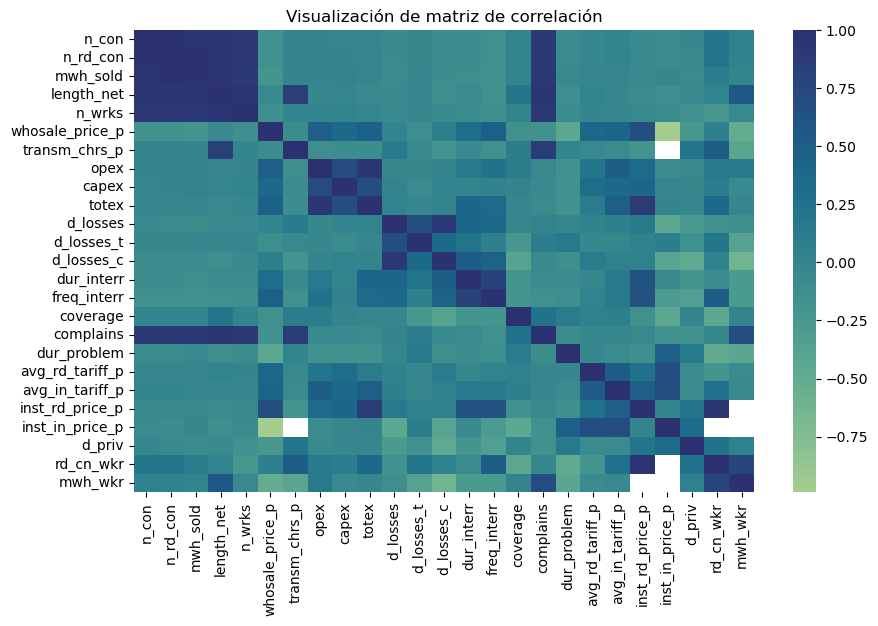

In [105]:
corr_gr=sns.heatmap(df_corr,  cmap="crest").set(xlabel="", ylabel="", title="Visualización de matriz de correlación")

### Algunos comentarios sobre lo observado. 

Existe una fuerta correlación entre algunas variables: 

* Numero de reclamos ("complains") con las variables "n_con", "mwh_sold", y otras que están relacionadas directamente con el tamaño de la empresa distribuidora.

* Cargos de transmisión ("transm_chrs_p") con cantidad de kmd e red ("lenght_net").

* TOTEX (Gastos en red de distribución) y precio de instalación residencial ("inst_rd_price_p")

En el otro extremo, la variables con menos correlación son: 

* Precio de instalación residencial e industrial vs valores de energía por empleado. 

* Precio de venta vs precio de instalación. 

### 6.3. Análisis de pérdidas de energía

Se realiza un análisis de información enfocándonos en las pérdidas de energía. 
Este indicador nos brinda información importante sobre la eficiencia operacional del sistema. 

Esencialmente las pérdidas se clasifican en (COnsiderando la nomenclatura del data set en uso): 

__d_losses__     ====>   Pérdidas totales en distribución, medidas como % de la energía total circulante

__d_losses_t__   ====>   Pérdidas técnicas en distribución (Por operación), medidas como % de la energía total circulante

__d_losses_c__   ====>   Pérdidas totales en distribución (Hurtos, errores de medida), medidas como % de la energía total circulante

Se realiza una tabla con los valores de pérdidas, promediando por año para toda LATAM.

In [106]:
#Obteniendo el promedio de perdidas de energía por año para graficar :
df_loss=df[["year","country","d_losses","d_losses_t","d_losses_c"]].groupby(by='year').mean(numeric_only=True)

df_loss_c=df[["year","country","d_losses","d_losses_t","d_losses_c"]]

df_loss_c

1,year,country,d_losses,d_losses_t,d_losses_c
2,1994,ECU,0.246392,NaN,NaN
3,1995,ECU,0.248841,NaN,NaN
4,1996,ECU,0.246485,NaN,NaN
5,1997,ECU,0.256774,NaN,NaN
6,1998,ECU,0.246590,NaN,NaN
...,...,...,...,...,...
4070,2002,VEN,NaN,NaN,NaN
4071,2003,VEN,NaN,NaN,NaN
4072,2004,VEN,NaN,NaN,NaN
4073,2005,VEN,NaN,NaN,NaN


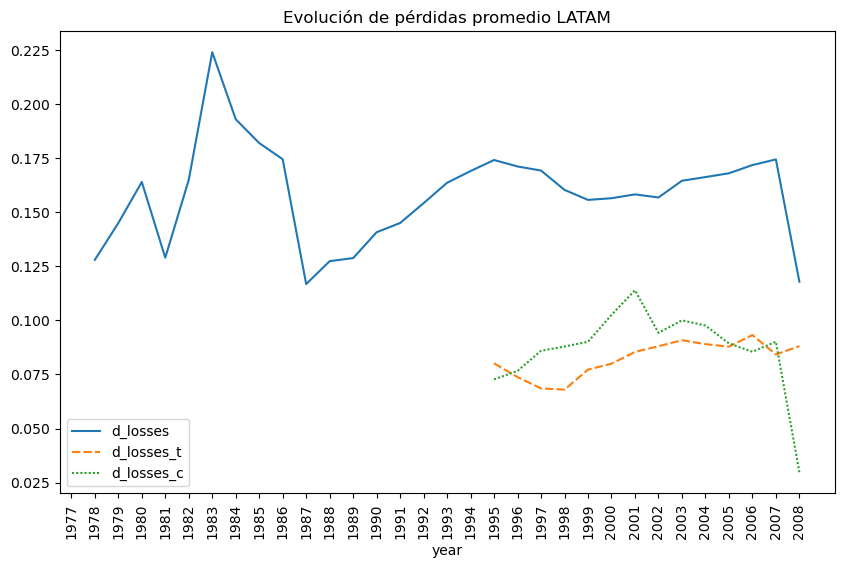

In [107]:
ax=sns.lineplot(data=df_loss)
ax.set_title("Evolución de pérdidas promedio LATAM")
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='lower left')



Observaciones importantes:

* Se observan registros de pérdidas de energía a partir de 1978. 

* Durante la década de los 80´ se registra un incremento en el índice de pérdidas totales de energía en la región llegando a un pico de 22%

* En la década del 2000 los niveles promedio de pérdidas de energía en las redes se situan en el orden del 15%. 

* A partir del 2007 se ve una caida abrupta, relacionada con al poca disponibilidad de información, por lo que se determina que el anális es valido hasta 2007. 

* Se observa que la disgregación de pérdidas entre técnicas y comerciales comienza a ser relevante a partir de 1995. 

* Luego del inicio de los registros de pérdidas tecnicas se observa que el promedio es estable hasta la finalización del período de disponibilidad de datos. 


Para el presente apartado se buscará analizar valores de pérdidas totales por pais, mediante un boxplot con el que ademas se verificara si existen outlyers. 
Por otra parte se buscará determinar si existe relación entre las pérdidas de energia y el volumen de energía manejado.

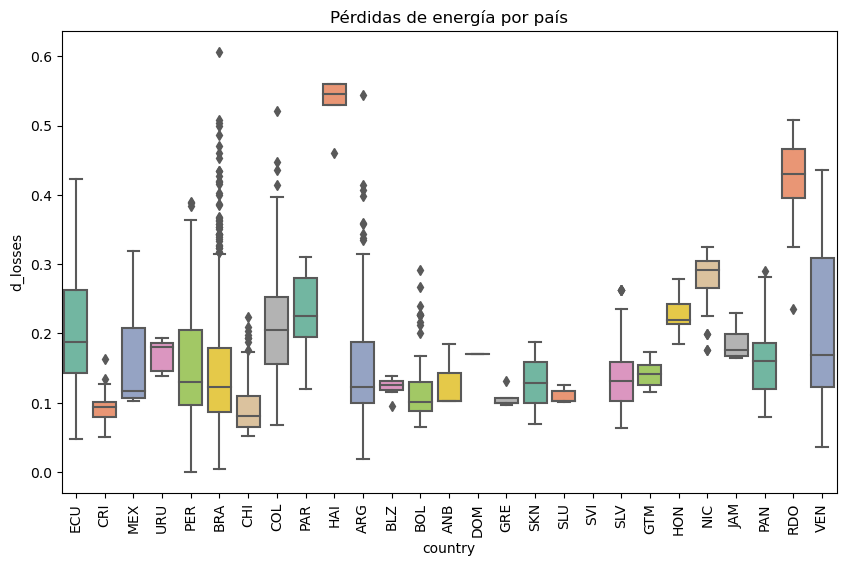

In [108]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
boxplot=sns.boxplot(x="country",
                y="d_losses",
                data=df, palette="Set2")
boxplot.set_title('Pérdidas de energía por país')

a=boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)



Se observa que Brasil posee la mayor cantidad de outlyers, seguido por Argentina y Bolivia. Para el caso de Haiti se considera que tiene la mayor cantidad de Perdidas de energía de la region, con un promedio, y valores caracteisticos del  boxplot excepcionalmente altos comparados con el resto de paises. 

Nota: Se logra mayor legibilidad con los nombres cortos de pais. 

## 8. Selección de variables (Feature selection)

Se plantea el análisis de las variables más relevantes para evitar redundancia en el modelo. Debido a que se pretende avanzar con un algoritmo de agrupación se define la variable objetivo  "d_losses" y el resto de variables originales se mantenienen en el Dataframe a evaluar. 

Se crean las variables X e y para realizar la selección de variables. 

Incialmente se realiza una imputación de valores NAN completando con el valor promedio, ya que se observó que estos valores afectan la funcionalidad del código:

In [21]:
df_fs=df[['n_con','n_rd_con', 'mwh_sold', 'length_net', 'n_wrks', 'whosale_price_p','transm_chrs_p', 'opex', 'capex', 'totex', 'd_losses', 'd_losses_t','d_losses_c', 'dur_interr', 'freq_interr', 'coverage', 'complains','dur_problem', 'avg_rd_tariff_p', 'avg_in_tariff_p', 'inst_rd_price_p','inst_in_price_p', 'd_priv', 'rd_cn_wkr', 'mwh_wkr']]


imputed = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed.fit(df_fs)

SimpleImputer()

#Normalizando los datos que ingresan al modelo 

df_fs=imputed.transform(df_fs)
df_fs=pd.DataFrame(df_fs, columns=df_corr.columns)
df_fs


1,n_con,n_rd_con,mwh_sold,length_net,n_wrks,whosale_price_p,transm_chrs_p,opex,capex,totex,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
0,633814.710549,566480.972142,3.680438e+06,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
1,633814.710549,566480.972142,1.188619e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
2,633814.710549,40018.500000,1.241185e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
3,633814.710549,566480.972142,1.340972e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
4,633814.710549,566480.972142,1.463048e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,293.000000,566480.972142,5.614700e+07,21312.286632,3548.000000,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
4069,314.000000,566480.972142,5.710900e+07,21312.286632,3588.000000,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
4070,337.000000,566480.972142,6.613000e+07,21312.286632,3796.000000,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865
4071,351.000000,566480.972142,7.275400e+07,21312.286632,3996.000000,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.000000,616.636542,2145.865


Se definen los parámetros de entrada para el algoritmo de Feature Selection, en este caso se maneja como variable objetivo la variable "d_losses":

In [22]:
X = df_fs.drop(columns='d_losses')
y = df_fs['d_losses']
X.head()  

1,n_con,n_rd_con,mwh_sold,length_net,n_wrks,whosale_price_p,transm_chrs_p,opex,capex,totex,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
0,633814.710549,566480.972142,3.680438e+06,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.0,616.636542,2145.865
1,633814.710549,566480.972142,1.188619e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.0,616.636542,2145.865
2,633814.710549,40018.500000,1.241185e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.0,616.636542,2145.865
3,633814.710549,566480.972142,1.340972e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.0,616.636542,2145.865
4,633814.710549,566480.972142,1.463048e+05,21312.286632,1536.077939,28461.248272,1.795768e+06,3.938807e+10,8.684386e+09,5.905462e+10,...,0.826956,69306.916376,24.800885,10446.986995,20234.974875,8004.447021,5649.624185,0.0,616.636542,2145.865


In [23]:
y.head()

0    0.246392
1    0.248841
2    0.246485
3    0.256774
4    0.246590
Name: d_losses, dtype: float64

## Implementación de Forward Selection 

Se utiliza sobre el DataSet la función propuesta para realizar el proceso. 

In [24]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist() # Define el listado de variables
    best_features = [] #Inicializa listado de variables a mantener en el modelo 
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [25]:
forward_selection(X,y)

['d_losses_c',
 'd_losses_t',
 'dur_interr',
 'd_priv',
 'inst_in_price_p',
 'transm_chrs_p',
 'totex',
 'capex',
 'n_wrks',
 'length_net']

## Implementación de Backward elimination

Se utiliza sobre el Data Set la función propuesta para realizar el proceso, la finalidad es comparar los resultados con la metodologia anterior.



In [26]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [27]:
backward_elimination(X,y)

['n_con',
 'mwh_sold',
 'length_net',
 'n_wrks',
 'transm_chrs_p',
 'capex',
 'totex',
 'd_losses_t',
 'd_losses_c',
 'dur_interr',
 'inst_in_price_p',
 'd_priv']

## Implementación de Sequential Feature Selector 

Se utiliza sobre el Data Set la funcionalidad de la librería mlxtend. 


In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [29]:
sfs.fit(X, y)
sfs.k_feature_names_ 

('length_net',
 'n_wrks',
 'transm_chrs_p',
 'capex',
 'totex',
 'd_losses_t',
 'd_losses_c',
 'dur_interr',
 'inst_in_price_p',
 'd_priv')

## Analisis del resultado 

Se observa que el método "Backward Elimination" propone 12 variables como las más representativas. 
El método Forward Selection brinda 10 variables como las más importantes. 

Se utilizarán los resultados del método Forward Selection para definir las variables que serán consideradas para el entrenamiento del modelo de clusterización mostrado a continuación, dado que además se tiene que el total de las variables de la lista más corta están contenidas en el listado del otro método. 

Listado de variables a considerar:

* d_losses_c
* d_losses_t
* dur_interr
* d_priv
* inst_in_price_p
* transm_chrs_p
* totex
* capex
* n_wrks
* length_net
* d_losses  (Fue usada como variable objetivo)

Se resalta además el hecho de que al utilizar la función *SequentialFeatureSelector* con una cantidad de 10 variables, el resultado es el mismo listado anterior. 



Si bien el resultado es útil a nivel de reducción en las variables, es probable que no todos los campos sean útiles a la hora de direccionar la estrategia comercial. 

Se recomenda para próximos avances en este estudio realizar el análisis con una menor cantidad de variables para lo cual puede ser útil el *SequentialFeatureSelector* 

## 9. Implementación de algoritmo de clasificación K-means

Se plantea inicialemente realizar una clusterización en función de las variables obtenidas en el apartado anterior como de mayor significancia, inicialmente se crea el DataFrame a utilizar:

In [30]:
df_1=df[['code', 'd_losses', 'd_losses_c','d_losses_t','dur_interr','d_priv','inst_in_price_p','transm_chrs_p','totex','capex','n_wrks','length_net']]

df_1.sample(10)

1,code,d_losses,d_losses_c,d_losses_t,dur_interr,d_priv,inst_in_price_p,transm_chrs_p,totex,capex,n_wrks,length_net
2933,EDESA,0.103800,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,170.0,8311.1
1796,ELFSM - SANTA MARIA,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2195,EMELARI,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2868,EDESUR,0.078000,NaN,NaN,4.172,1.0,NaN,NaN,NaN,NaN,2630.0,28710.0
2857,EDESUR,0.218468,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2684,EEAMAZONAS,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,62.0,NaN
971,CEEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3247,Coop SALTO,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3933,CALEV,0.052800,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,670.0,1241.0
1655,CNEE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


A continuación se define la cantidad de empresas que entrarán al modelo de clasificación:

In [31]:
num_empresas=len(df_1["code"].unique())
print(f"La cantidad total de empresas a considerar es de {num_empresas} en total")

La cantidad total de empresas a considerar es de 257 en total


Se observa que el total de empresas de la región a analizar es suficiente para justificar la necesidad de implementar un modelo de clasificación. 

Verificamos cantidad de valores NAN, para evaluar si es requerrida alguna corrección en los datos. 

In [32]:
df_1.isna().sum()

1
code                 14
d_losses           1575
d_losses_c         3556
d_losses_t         3551
dur_interr         2891
d_priv              383
inst_in_price_p    3954
transm_chrs_p      3788
totex              2873
capex              3078
n_wrks             1805
length_net         2880
dtype: int64

Se observa que por la cantidad de datos nulos es requerida alguna estrategia para el tratamieto de estos valores. 
Debido a que enlos registro se tiene información histórica (corresponde a la evolución en el tiempo de los registros), además en función de la naturaleza de los parámetros analizados, se recomienda utilizar los valores promedio de cada parámetro por empresa. De esta forma se obtendrá un data set con el valor máximo de cada variable por empresa.

In [33]:
df_1=df[['code', 'd_losses', 'd_losses_c','d_losses_t','dur_interr','d_priv','inst_in_price_p','transm_chrs_p','totex','capex','n_wrks','length_net']]
df_1.sample(15)

1,code,d_losses,d_losses_c,d_losses_t,dur_interr,d_priv,inst_in_price_p,transm_chrs_p,totex,capex,n_wrks,length_net
1352,COPEL,0.112200,NaN,NaN,14.79,1.0,NaN,4.83,1.851692e+09,3.801000e+08,5826.0,170693.00
1051,CELPA PA,0.236000,NaN,NaN,34.42,1.0,NaN,NaN,2.565610e+08,8.990000e+07,2332.0,NaN
2293,FRONTEL,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3915,EDC- AES,0.177925,0.103825,0.0741,6.22,1.0,NaN,NaN,1.260000e+12,4.540000e+11,2615.0,NaN
1359,FORCEL,0.035394,NaN,NaN,2.14,1.0,NaN,NaN,NaN,NaN,31.0,219.00
2350,LUZLINARES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,CENF,0.105769,NaN,NaN,18.49,0.0,NaN,NaN,NaN,NaN,127.0,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,LUZ del Sur,0.122000,0.039000,0.0830,NaN,1.0,NaN,NaN,7.843179e+08,1.046049e+08,728.0,14063.53
406,LyFC,0.318300,0.189700,0.1286,NaN,NaN,NaN,NaN,9.642231e+09,1.506743e+09,11624.0,NaN


In [34]:
df_1=df_1.groupby(by="code").max()
df_1

1,d_losses,d_losses_c,d_losses_t,dur_interr,d_priv,inst_in_price_p,transm_chrs_p,totex,capex,n_wrks,length_net
code,,,,,,,,,,,
AES CLESA,0.158579,0.046000,0.098400,38.55,1.0,NaN,NaN,NaN,NaN,336.0,8786.000
AES Sul RS,0.116874,0.039600,0.051500,24.45,1.0,NaN,5.092,6.052830e+08,1.582670e+08,937.0,53417.000
AMBATO,0.173732,0.048737,0.114870,22.42,0.0,NaN,NaN,1.969589e+07,1.217028e+07,317.0,9654.710
ANDE,0.310900,0.235000,0.084300,18.85,0.0,NaN,25535.000,2.740000e+11,1.760000e+11,3325.0,58211.650
APELP,0.544000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,164.0,3490.000
...,...,...,...,...,...,...,...,...,...,...,...
TIL TIL,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,25.0,NaN
TULUA,0.128100,0.104100,NaN,82.74,0.0,NaN,18567.000,1.470000e+11,3.897001e+09,107.0,292.750
Tocache,0.388000,0.239677,0.020841,NaN,NaN,633.94,NaN,7.687178e+07,4.166784e+06,28.0,309.444


In [35]:
escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(df_1)

In [36]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
    return result
df_norm=normalize(df_1)

A continuación se grafican los datos normalizados:

[Text(0.5, 1.0, 'Gráfica de parametros normalizados')]

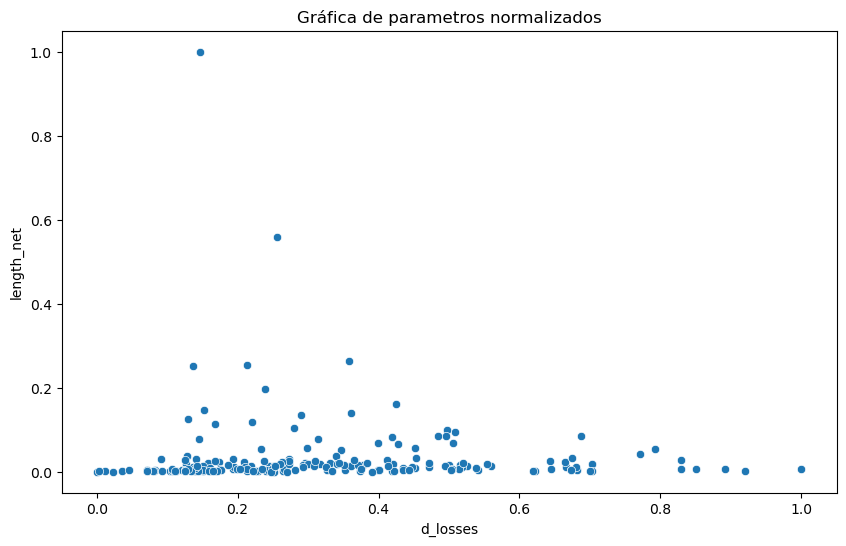

In [37]:

sns.scatterplot(data=df_norm, x="d_losses", y="length_net").set(title='Gráfica de parametros normalizados')

Se observa un adecuado resultado despues de la normalización. A continuación se verifica si luego dela normalización persisten los datos NAN. 

In [38]:
df_norm.isna().sum()

1
d_losses            30
d_losses_c         152
d_losses_t         150
dur_interr         102
d_priv               6
inst_in_price_p    240
transm_chrs_p      182
totex               96
capex               95
n_wrks              18
length_net          54
dtype: int64

Es requerido un proceso de imputación antes de la definición de los datos para ingresar al modelo de clasificación:

In [39]:
#Imputamos los vadlores NAN

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean.fit(df_norm)

SimpleImputer()


df_norm_imp=imp_mean.transform(df_norm)
X=df_norm_imp
df_norm_imp



array([[2.18242768e-01, 9.05511811e-02, 2.50866860e-01, ...,
        3.78195885e-02, 7.59435586e-03, 1.29116917e-02],
       [1.45357541e-01, 7.79527559e-02, 1.07636757e-01, ...,
        3.48584105e-04, 2.13835035e-02, 7.85172730e-02],
       [2.44724930e-01, 9.59385571e-02, 3.01164224e-01, ...,
        2.67851490e-05, 7.15842606e-03, 1.41886567e-02],
       ...,
       [6.19189095e-01, 4.71804602e-01, 1.40071925e-02, ...,
        9.15630857e-06, 5.27704485e-04, 4.51532093e-04],
       [2.80146802e-01, 2.02375068e-01, 2.65839067e-01, ...,
        3.78195885e-02, 1.32820925e-01, 1.02969982e-01],
       [3.14920461e-01, 2.02375068e-01, 2.65839067e-01, ...,
        5.32045351e-05, 6.17184811e-03, 5.02915855e-04]])

Se define el Dataframe para ingresar al modelo:

In [40]:
index=df_1.index.to_numpy()
cols = [df_1.columns] 
df_2 = pd.DataFrame(df_norm_imp, columns=cols)
df_2.sample(15)  

1,d_losses,d_losses_c,d_losses_t,dur_interr,d_priv,inst_in_price_p,transm_chrs_p,totex,capex,n_wrks,length_net
220,0.314920,0.202375,0.265839,0.092042,1.0,0.299836,2.821726e-02,0.053099,0.037820,0.037116,0.031708
1,0.145358,0.077953,0.107637,0.034698,1.0,0.299836,6.015528e-08,0.000356,0.000349,0.021384,0.078517
130,0.771234,0.202375,0.265839,0.261974,1.0,0.299836,9.488279e-03,0.001005,0.000846,0.172904,0.043033
36,0.140886,0.110471,0.145247,0.017314,0.0,0.299836,2.821726e-02,0.000018,0.000042,0.011013,0.030364
176,0.131597,0.202375,0.265839,0.092042,1.0,0.299836,2.821726e-02,0.029434,0.023493,0.064678,0.031708
200,0.471164,0.202375,0.265839,0.877485,1.0,0.299836,2.083934e-04,0.502941,0.951542,0.029712,0.020883
120,0.168298,0.202375,0.265839,0.092042,1.0,0.299836,2.821726e-02,0.053099,0.037820,0.016313,0.024689
125,0.213736,0.202375,0.265839,0.092042,1.0,0.299836,2.821726e-02,0.053099,0.037820,0.006814,0.007163
53,0.134918,0.060433,0.212420,0.013638,1.0,0.299836,4.765640e-08,0.000020,0.000014,0.003464,0.006407
90,0.130199,0.202375,0.265839,0.092042,0.0,0.299836,2.821726e-02,0.053099,0.037820,0.001767,0.003278


Se confirma que el modelo está libre de campos NAN.

In [41]:

df_2.isna().sum()

1              
d_losses           0
d_losses_c         0
d_losses_t         0
dur_interr         0
d_priv             0
inst_in_price_p    0
transm_chrs_p      0
totex              0
capex              0
n_wrks             0
length_net         0
dtype: int64

### Se avanza con el proceso de agrupamiento, el número de clusters definido inicialmente es 5. 

In [42]:
k = 5 
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_2)
labels = kmeans.predict(df_2)
centroids = kmeans.cluster_centers_
centroids

array([[2.39380557e-01, 1.60397793e-01, 2.46579067e-01, 6.39766980e-02,
        9.88869565e-01, 2.97223740e-01, 2.02445858e-02, 3.17262422e-02,
        2.02103885e-02, 3.50597223e-02, 3.53889634e-02],
       [6.04621903e-01, 3.71494184e-01, 3.29901631e-01, 1.52480070e-01,
        2.22044605e-16, 2.88811606e-01, 2.03436542e-02, 6.53846710e-02,
        3.96683000e-02, 3.49511013e-02, 1.83876136e-02],
       [3.97598967e-01, 1.70135671e-01, 2.42564846e-01, 4.10811041e-01,
        8.00000000e-01, 2.99835699e-01, 5.80827744e-03, 7.74705830e-01,
        6.02977644e-01, 7.45898818e-02, 1.93502876e-02],
       [2.35636388e-01, 1.86752690e-01, 2.58053299e-01, 8.88201523e-02,
        3.33066907e-16, 2.98391332e-01, 2.37358107e-02, 4.97953956e-02,
        4.00890336e-02, 3.95204464e-02, 3.16501518e-02],
       [6.33562950e-01, 2.87178344e-01, 3.33325322e-01, 1.22490782e-01,
        9.57333333e-01, 3.44514384e-01, 1.25248472e-01, 6.23551792e-03,
        4.60545045e-03, 3.79067722e-02, 3.08040910e-

In [43]:
labels

array([0, 0, 3, 1, 1, 3, 3, 0, 0, 3, 1, 1, 0, 0, 3, 3, 0, 0, 1, 4, 1, 0,
       1, 1, 3, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 1, 3, 4, 0, 4, 0, 3, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 4, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 3, 4, 0,
       1, 3, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3,
       0, 3, 0, 1, 0, 0, 4, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 4, 0, 3, 3, 1, 1, 0, 0, 4, 4, 3, 3, 3, 0, 0, 0, 1, 3, 3,
       2, 3, 2, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 4, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 4, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 3, 1, 0, 3, 0, 3, 4, 3, 3])

In [44]:
df_clusters=pd.DataFrame(labels, columns=["cluster"])
df_clusters

,cluster
0,0
1,0
2,3
3,1
4,1
...,...
251,0
252,3
253,4
254,3


A continuación se prepara un dataframe de resultados para crear gráficas y analizar el resultado:

In [45]:
df_2=df_2
df_result= pd.concat([df_2,df_clusters],axis=1)
df_result

,"(d_losses,)","(d_losses_c,)","(d_losses_t,)","(dur_interr,)","(d_priv,)","(inst_in_price_p,)","(transm_chrs_p,)","(totex,)","(capex,)","(n_wrks,)","(length_net,)",cluster
0,0.218243,0.090551,0.250867,0.054708,1.000,0.299836,2.821726e-02,0.053099,0.037820,0.007594,0.012912,0
1,0.145358,0.077953,0.107637,0.034698,1.000,0.299836,6.015528e-08,0.000356,0.000349,0.021384,0.078517,0
2,0.244725,0.095939,0.301164,0.031817,0.000,0.299836,2.821726e-02,0.000011,0.000027,0.007158,0.014189,3
3,0.484446,0.462598,0.207806,0.026751,0.000,0.299836,3.016624e-04,0.161176,0.387665,0.076173,0.085565,1
4,0.891821,0.202375,0.265839,0.092042,0.000,0.299836,2.821726e-02,0.053099,0.037820,0.003648,0.005127,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.314920,0.202375,0.265839,0.092042,1.000,0.299836,2.821726e-02,0.053099,0.037820,0.000459,0.031708,0
252,0.164977,0.204921,0.265839,0.117420,0.000,0.299836,2.193447e-04,0.086470,0.008584,0.002340,0.000427,3
253,0.619189,0.471805,0.014007,0.092042,0.616,0.023733,2.821726e-02,0.000045,0.000009,0.000528,0.000452,4
254,0.280147,0.202375,0.265839,0.051799,0.000,0.299836,2.821726e-02,0.053099,0.037820,0.132821,0.102970,3


In [46]:
type(df_result)

pandas.core.frame.DataFrame

In [47]:
df_result.columns

Index([       ('d_losses',),      ('d_losses_c',),      ('d_losses_t',),
            ('dur_interr',),          ('d_priv',), ('inst_in_price_p',),
         ('transm_chrs_p',),           ('totex',),           ('capex',),
                ('n_wrks',),      ('length_net',),            'cluster'],
      dtype='object')

In [48]:
df_result.columns=('d_losses', 'd_losses_c','d_losses_t','dur_interr','d_priv','inst_in_price_p','transm_chrs_p','totex','capex','n_wrks','length_net','cluster')
df_result

,d_losses,d_losses_c,d_losses_t,dur_interr,d_priv,inst_in_price_p,transm_chrs_p,totex,capex,n_wrks,length_net,cluster
0,0.218243,0.090551,0.250867,0.054708,1.000,0.299836,2.821726e-02,0.053099,0.037820,0.007594,0.012912,0
1,0.145358,0.077953,0.107637,0.034698,1.000,0.299836,6.015528e-08,0.000356,0.000349,0.021384,0.078517,0
2,0.244725,0.095939,0.301164,0.031817,0.000,0.299836,2.821726e-02,0.000011,0.000027,0.007158,0.014189,3
3,0.484446,0.462598,0.207806,0.026751,0.000,0.299836,3.016624e-04,0.161176,0.387665,0.076173,0.085565,1
4,0.891821,0.202375,0.265839,0.092042,0.000,0.299836,2.821726e-02,0.053099,0.037820,0.003648,0.005127,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.314920,0.202375,0.265839,0.092042,1.000,0.299836,2.821726e-02,0.053099,0.037820,0.000459,0.031708,0
252,0.164977,0.204921,0.265839,0.117420,0.000,0.299836,2.193447e-04,0.086470,0.008584,0.002340,0.000427,3
253,0.619189,0.471805,0.014007,0.092042,0.616,0.023733,2.821726e-02,0.000045,0.000009,0.000528,0.000452,4
254,0.280147,0.202375,0.265839,0.051799,0.000,0.299836,2.821726e-02,0.053099,0.037820,0.132821,0.102970,3


El Dataframe siguiente es el resultado de la clusterización y filtrado de datos:

In [49]:
#Se corrige el index
df_result.index=df_1.index
df_result

,d_losses,d_losses_c,d_losses_t,dur_interr,d_priv,inst_in_price_p,transm_chrs_p,totex,capex,n_wrks,length_net,cluster
code,,,,,,,,,,,,
AES CLESA,0.218243,0.090551,0.250867,0.054708,1.000,0.299836,2.821726e-02,0.053099,0.037820,0.007594,0.012912,0
AES Sul RS,0.145358,0.077953,0.107637,0.034698,1.000,0.299836,6.015528e-08,0.000356,0.000349,0.021384,0.078517,0
AMBATO,0.244725,0.095939,0.301164,0.031817,0.000,0.299836,2.821726e-02,0.000011,0.000027,0.007158,0.014189,3
ANDE,0.484446,0.462598,0.207806,0.026751,0.000,0.299836,3.016624e-04,0.161176,0.387665,0.076173,0.085565,1
APELP,0.891821,0.202375,0.265839,0.092042,0.000,0.299836,2.821726e-02,0.053099,0.037820,0.003648,0.005127,1
...,...,...,...,...,...,...,...,...,...,...,...,...
TIL TIL,0.314920,0.202375,0.265839,0.092042,1.000,0.299836,2.821726e-02,0.053099,0.037820,0.000459,0.031708,0
TULUA,0.164977,0.204921,0.265839,0.117420,0.000,0.299836,2.193447e-04,0.086470,0.008584,0.002340,0.000427,3
Tocache,0.619189,0.471805,0.014007,0.092042,0.616,0.023733,2.821726e-02,0.000045,0.000009,0.000528,0.000452,4


### A continuación se grafican algunas relaciones entre variables verificando la distribución de grupos generados. 

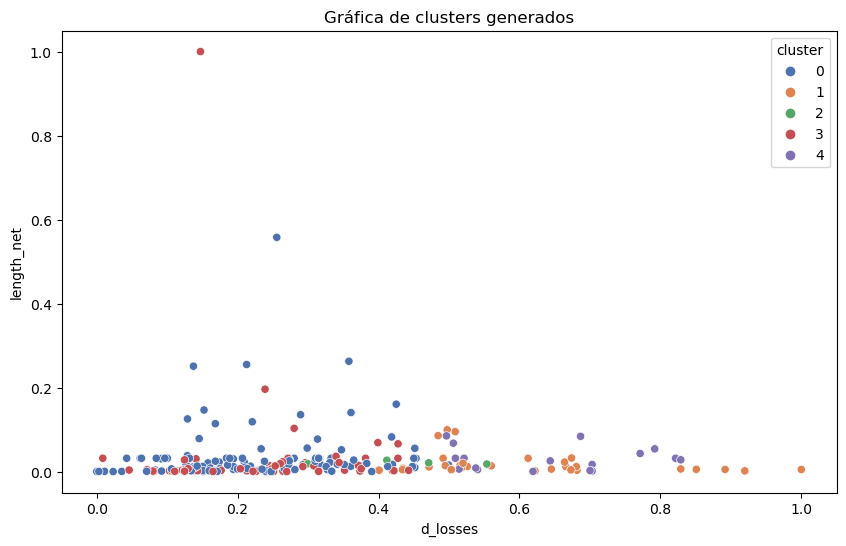

In [50]:
ax=sns.scatterplot(data=df_result, x="d_losses", y="length_net", hue="cluster", palette="deep").set(title='Gráfica de clusters generados')

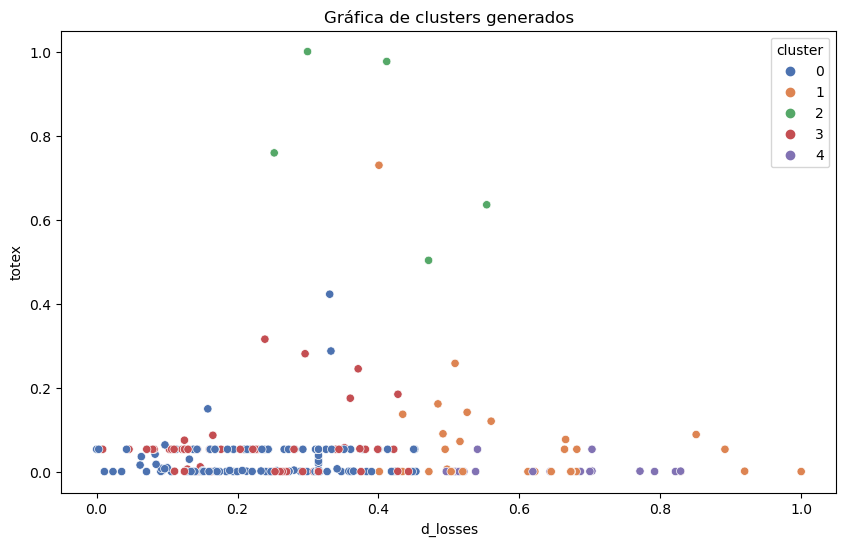

In [51]:
ax=sns.scatterplot(data=df_result, x="d_losses", y="totex", hue="cluster", palette="deep").set(title='Gráfica de clusters generados')

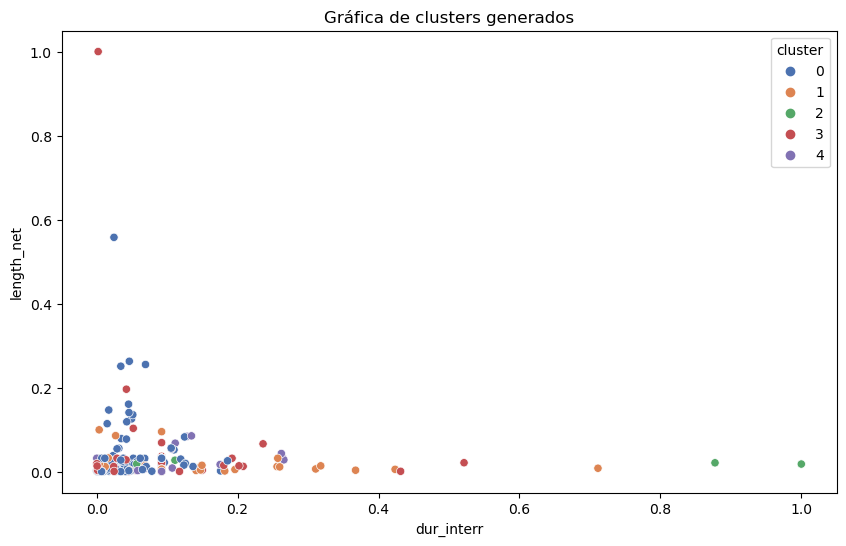

In [52]:
ax=sns.scatterplot(data=df_result, x="dur_interr", y="length_net", hue="cluster", palette="deep").set(title='Gráfica de clusters generados')

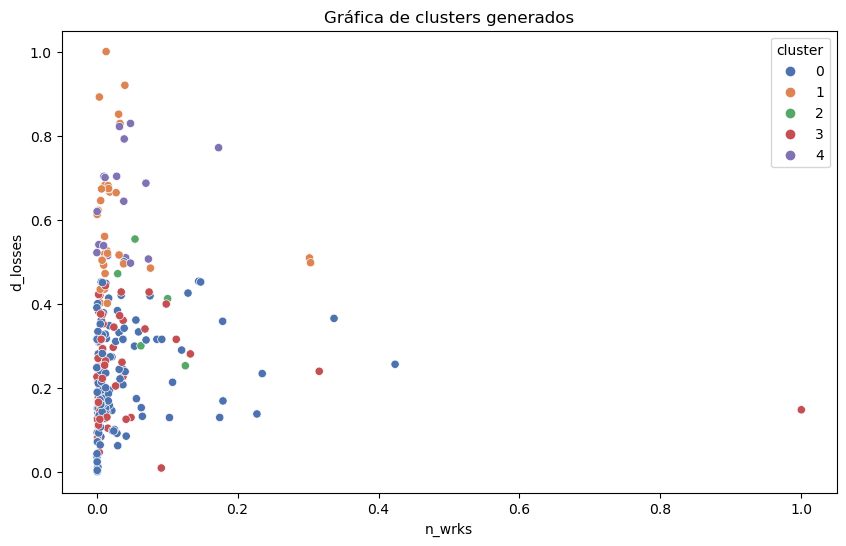

In [53]:


ax=sns.scatterplot(data=df_result, x="n_wrks", y="d_losses", hue="cluster", palette="deep").set(title='Gráfica de clusters generados')

Se observa de los resultados de los gráficos, que en general se ven bien definidos 6 grupos, el sexto observado no es tan notable (Posible efecto de outlyers)

Se calcula un conteo de empresas por cluster:

Text(0, 0.5, 'Cantidad')

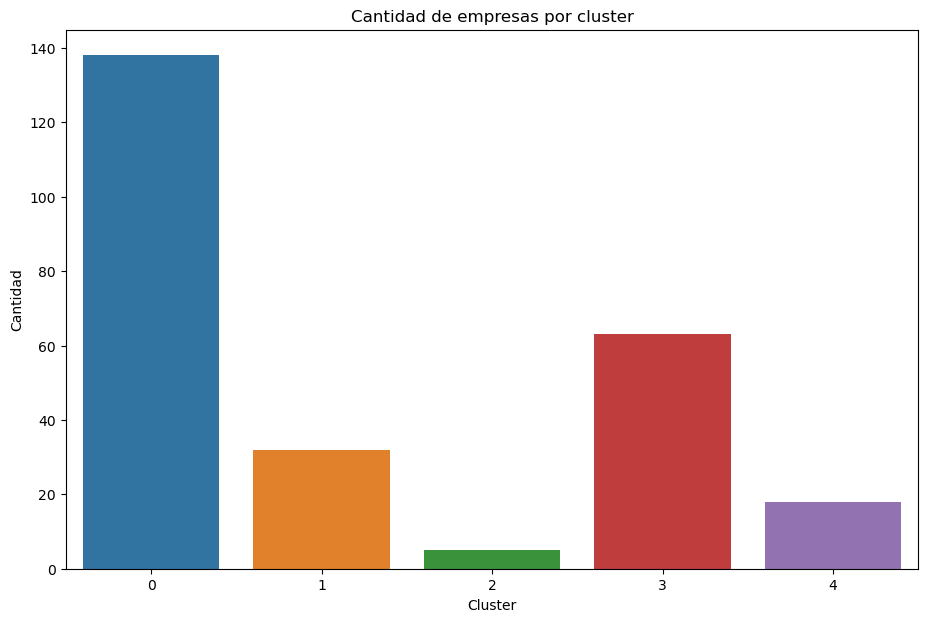

In [92]:
fig, bar = plt.subplots(figsize = (11,7))
bar = sns.barplot(df_result.groupby(by="cluster").count(), x = df_result.groupby(by="cluster").count().index, y = "d_losses")
bar.set_title('Cantidad de empresas por cluster')

bar.set_xlabel('Cluster',fontsize = 10 )
bar.set_ylabel('Cantidad',fontsize = 10 )

Tal como se observaba gráficamente, si bien la distribución de clusters es desequilibrada, mantener las variables propuestas para el algoritmo de clasigficación genera un solo cluster con 5 empresas. 

Si bien visualmente es más difícil apreciar el agupamiento consecuencia de la multidimensionalidad, se estima que este agrupamiento podrá permitir orientar adecuadamente la estrategia. 

### Métricas para evaluar el modelo de clasificación K-means

En este apartado se evalua una serie de métricas para evaluar el modelo impementado.

Para la presente entrega se considerarán 2 métricas



### *Inertia* - Verificación mediante el método del codo

Se considera que este valor indica un buen desempeño si es de balor absoluto bajo.

In [55]:
inertia = kmeans.inertia_

print (f"El valor de inertia calculado para el modelo es: {inertia:,.2f}")

El valor de inertia calculado para el modelo es: 22.00


Para verificar si es un valor "Bueno" se realiza la gráfica del codo:

In [56]:
clusters = []
inertias = []

for i in range(2,11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df_2)
    labels = kmeans.predict(df_2)
    centroids = kmeans.cluster_centers_
    centroids
    
    inertia = kmeans.inertia_
    
    clusters.append(i)
    inertias.append(inertia)

clusters = np.array(clusters)
inertias = np.array(inertias)

codo = pd.DataFrame(inertias, index=clusters)


Text(0.5, 1.0, 'Gráfica por método del codo')

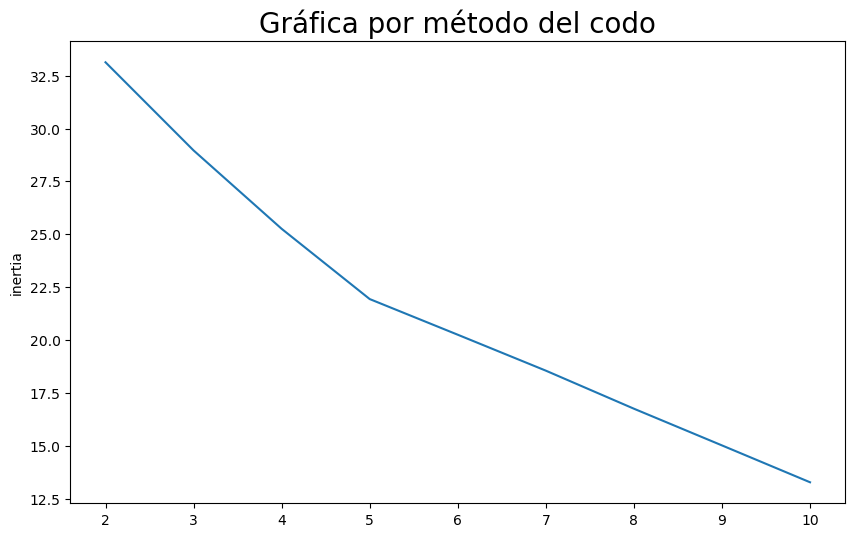

In [57]:
codo.columns=["inertia"]
sns.lineplot(codo, x=codo.index, y="inertia").set_title("Gráfica por método del codo", size=20)

Según se observa, con el numero de clusters elegido (5), y en función de la forma del gráfico, se ve una tendencia en cambio de la pendiente, no obstante hacia el valor de 10 clusters no logra verse cun comportamiento asintótico. 


### *Índice de Calinski-Harabasz* - Verificación mediante el método del codo

Se considera que este valor indica un buen desempeño si es de alto valor, lo cual indicaría buena densidad y separación de los clusters. 

In [58]:
ch_score= sklearn.metrics.calinski_harabasz_score(X, labels)
print (f"El valor del índice calculado para el modelo es: {ch_score:,.2f}")

El valor del índice calculado para el modelo es: 162.25


A continuación se presenta una gráfica indicando la variación de este indicador en función de la cantidad de clústers. 

In [59]:
clusters_1 = []
scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df_2)
    labels = kmeans.predict(df_2)
    centroids = kmeans.cluster_centers_
    centroids
    ch_score= sklearn.metrics.calinski_harabasz_score(X, labels)
    clusters_1.append(i)
    scores.append(ch_score)
clusters_1 = np.array(clusters_1)
scores = np.array(scores)
ch_scores = pd.DataFrame(scores, index=clusters_1)

Text(0.5, 1.0, 'Gráfica de ch_score')

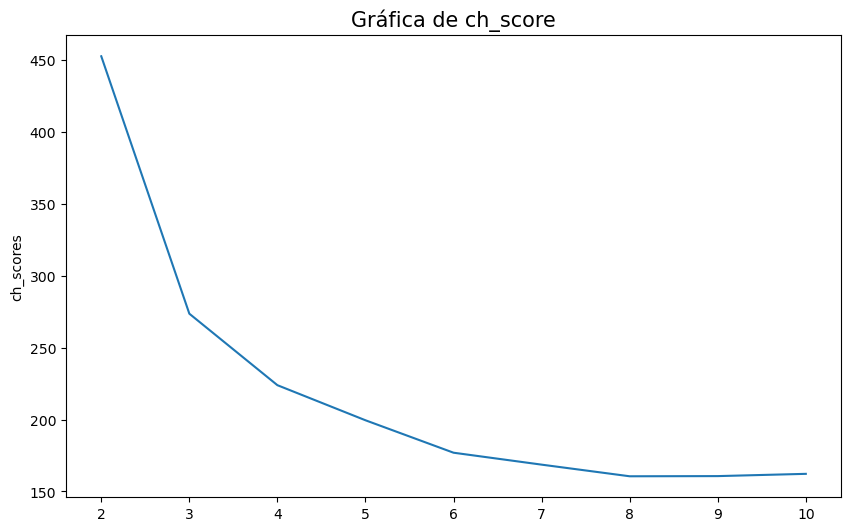

In [60]:
ch_scores.columns=["ch_scores"]
sns.lineplot(ch_scores, x=ch_scores.index, y="ch_scores").set_title("Gráfica de ch_score", size=15)

Según la métrica Calinski-Harabasz a mayor valor indica mejor desempeño del modelo, por lo anterior se aprecia que un límite para la cantidad de clústers se fijaría en 4.

#### Según se observa con el análisis de las métricas el modelo se encuentra cerca de un valor óptimo de clusters. Se recomienda para etapas posteriores del estudio evaluar la eliminació de Outlyers ya que se presume que con esto se podrá mejorar el desempeño del modelo. Se recomienda además implementar una herramienta difernte de agrupamiento para verificar si se puede lograr mejora en función del dataset disponible.


## 10. Aplicación de DBSCAN 

Se realiza adicionalmente la clusterización con el algoritmo DBSCAN. Se definen las variables eps=0.2 y min_samples=3 con las cuales se logran 5 clusters. 

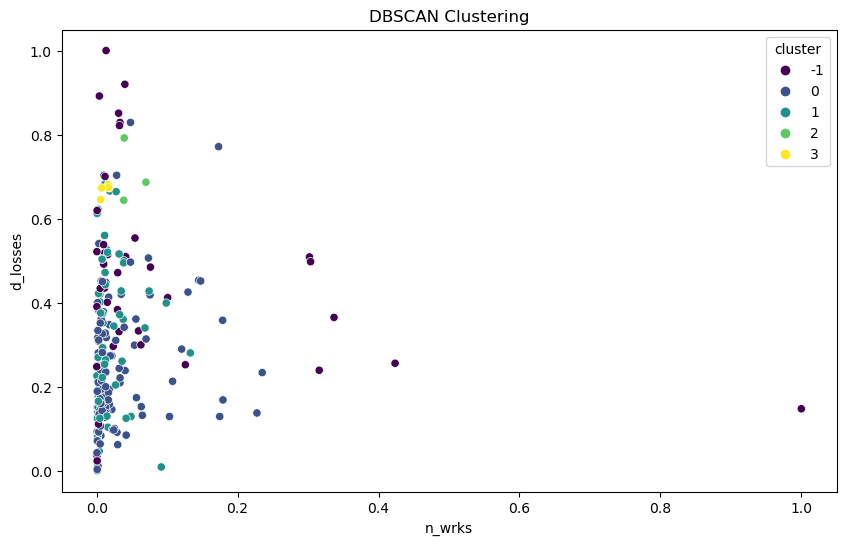

In [141]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_db=df_norm.copy()



eps = 0.2
min_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_db['cluster'] = dbscan.fit_predict(X)

# Visualización de resultado
sns.scatterplot(y="d_losses", x="n_wrks" , hue='cluster', data=df_db, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()



In [62]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.31080042064541247

### *Indice de Silhouete* 

Se considera que este valor indica un buen desempeño si es de alto valor, lo cual indicaría buena densidad y separación de los clusters. 


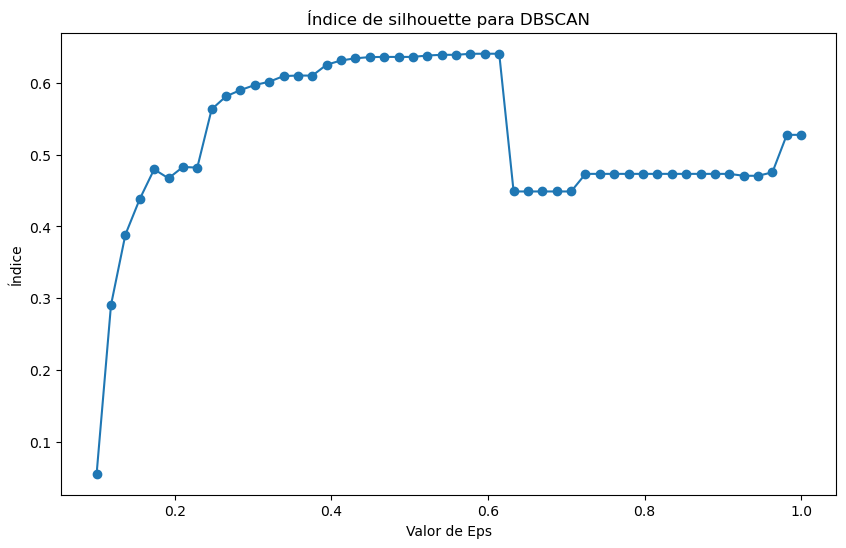

In [139]:
# Se calcula el índice en función del valor eps
min_eps = 0.1
max_eps = 1.0
num_eps_values = 50
eps_values = np.linspace(min_eps, max_eps, num_eps_values)

silhouette_scores = []

# Iterar sobre diferentes valores de epsilon
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X)
    
    # Calculo del índice
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el índice en función de los valores de epsilon
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Índice de silhouette para DBSCAN')
plt.xlabel('Valor de Eps')
plt.ylabel('Índice')
plt.show()

Un valor alto indica clusters bien definidos, a medida aumenta el performance del modelo se incrementa, para el caso en estudio, vemos que no se logra un uncremento útil a partir de un valor épsilon de 0.6. 

A partir de los resultados anteriores no se observa una mejora respecto al desempeño del algoritmo *K-means.* 

## 11.  Comparación de agrupamientos con K-means vs DBSCAN

Se desea comparar el desempeño de ambos algoritmos mediante la cantidad de empresas por cluster. 

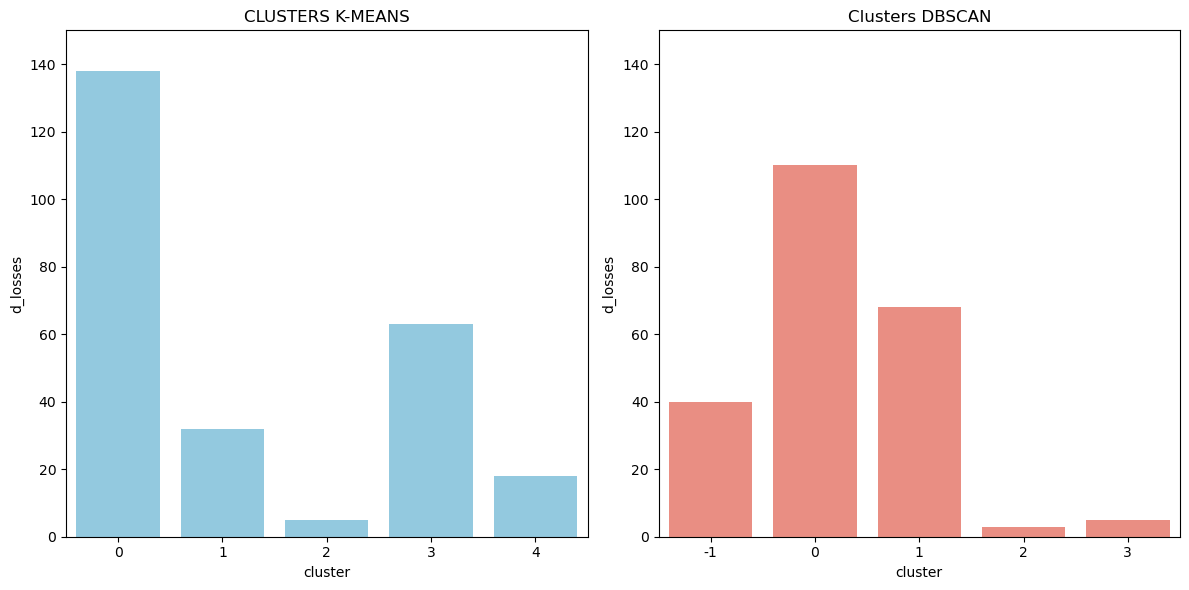

In [132]:

# Gráfico comparativo de ambos algoritmos de clusterización.

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(df_result.groupby(by="cluster").count(),x = df_result.groupby(by="cluster").count().index, y = "d_losses", ax=ax[0], color='skyblue')
ax[0].set_title('CLUSTERS K-MEANS')
ax[0].set_ylim(0, 150)


sns.barplot(df_db.groupby(by="cluster").count(),x = df_db.groupby(by="cluster").count().index, y = "d_losses", color='salmon')
ax[1].set_title('Clusters DBSCAN')
ax[1].set_ylim(0, 150)

# Ajustar el diseño
plt.tight_layout()
plt.show()



Se observa que al generar condiciones de clusterización similares para ambos algoritmos, en ambos casos se tiene disparidad en los grupos observados. 

Para el caso de K-MEANS se obtiene un grupo con mayor cantidad de regitros, y uno con un tamaño muy pequeño, mientras que para el caso de DBSCAN se tienen 3 grupos similares y 2 con muy pocos registros. 

## 12. Conclusiones



### Hipótesis:

Las empresas pueden agruparse en función de parámetros como el índice de pérdidas de energía, km de lineas, energía transportada, cantidad de usuarios, de este modo pueden generarse categorías para orientar las estrategias comerciales de la compañía. 
* <span style="color:blue"> Se observa que fue posible generar las categorías para orientar la estrategia comercial. Será posible en una etapa posterior del análisis determinar las carácterísticas de cada cluster para definir las etrategias asociadas a cada uno. 
</span>

La orientación de la estrategia comercial para empresas dentro del mismo país puede ser diferente.  

* <span style="color:blue"> Para este caso se observa que como la generación de los grupos no fue influenciada por la variable categórica "country", pueden haber varias estrategias recomendadas para empresas dentro de un mismo país. </span>


### Preguntas formuladas:

Es posible agrupar las empresas eléctricas en diferentes clusters para orientar las estrategias de ventas?
* <span style="color:blue"> Del proceso realizado se observa que es viable realizar el agrupamiento utilizando el algoritmo de k-means </span>


Es posible agregar a los grupos definidos un factor de agrupamiento por zona geográfica? 

* <span style="color:blue">Si bien esto es posible, a lo largo del análisis se observó que al agregar influencia dela variable categórica "country" esto podía influir en la creación de los clusters, lo cual además no daría valor agregado pues inicialmente una de las primeras tendencias es agrupar por país.  </span>

Es posible mantener la misma estrategia comercial a nivel país? 

* <span style="color:blue">Para este caso es recomendable mantener y definir las estrategias inicialemente por resultados del modelo.</span>

 

## 13. Recomendaciones

Se recomenda en una futura entrega ampliar en análisis en las características de cada estrategia comercial según los agrupamientos generados, generar una presentación gerencial para exponer los resultados a audiencias con diferentes perfiles. 


Se recomienda que la estrategia comercial sea manejada incialmente por empresa según los grupos generados y no por país en una primera instancia. 

Evaluar la posibilidad de ver con qué grado los clusters generados por ambos algoritmos presentan similitudes, explorando alguna gráfica multivariada o una librería específica para tal fin. 

Se recomienda evaluar la influencia de algunos grupos registros atípicos para una etapoa siguiente de la entrega y ahondar en las diferencias entre los dos modelos implementados.  